In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import time
from sklearn.metrics import pairwise_distances

In [ ]:
df = pd.read_csv("/content/diabetes_prediction_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [ ]:

concept_hierarchy = {
    'never': 1,'No Info': 2,'current': 3,'ever':4,'former':5,'not current':6
}

df['smoking_history'] = df["smoking_history"].map(concept_hierarchy)
del df["gender"]
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  100000 non-null  float64
 1   hypertension         100000 non-null  int64  
 2   heart_disease        100000 non-null  int64  
 3   smoking_history      100000 non-null  int64  
 4   bmi                  100000 non-null  float64
 5   HbA1c_level          100000 non-null  float64
 6   blood_glucose_level  100000 non-null  int64  
 7   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 6.1 MB


In [ ]:
#@title training and Testing
X = df[[ 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
# X = df[[ 'age', 'hypertension', 'heart_disease', 'smoking_history']]
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
#@title Discretizer

est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
df_discrete = est.fit_transform(X)
df.head()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,1,25.19,6.6,140,0
1,54.0,0,0,2,27.32,6.6,80,0
2,28.0,0,0,1,27.32,5.7,158,0
3,36.0,0,0,3,23.45,5.0,155,0
4,76.0,1,1,3,20.14,4.8,155,0


In [ ]:
#@title LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X, y)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


errors []
wcss: 580438.9561370256
BSS: 2143012.7587953345


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


errors [580438.9561370256]
wcss: 494420.1407604324
BSS: 2143012.7587953345


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


errors [580438.9561370256, 494420.1407604324]
wcss: 410938.7705394379
BSS: 2143012.7587953345


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


errors [580438.9561370256, 494420.1407604324, 410938.7705394379]
wcss: 353638.4448445846
BSS: 2143012.7587953345


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


errors [580438.9561370256, 494420.1407604324, 410938.7705394379, 353638.4448445846]
wcss: 317477.78467201954
BSS: 2143012.7587953345


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


errors [580438.9561370256, 494420.1407604324, 410938.7705394379, 353638.4448445846, 317477.78467201954]
wcss: 294761.6350025948
BSS: 2143012.7587953345


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


errors [580438.9561370256, 494420.1407604324, 410938.7705394379, 353638.4448445846, 317477.78467201954, 294761.6350025948]
wcss: 274983.1478934203
BSS: 2143012.7587953345


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


errors [580438.9561370256, 494420.1407604324, 410938.7705394379, 353638.4448445846, 317477.78467201954, 294761.6350025948, 274983.1478934203]
wcss: 260429.55876244063
BSS: 2143012.7587953345


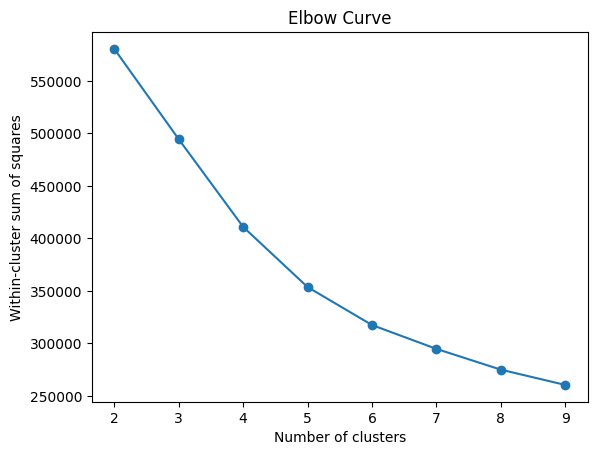

In [ ]:
#@title No of clusters per sum of square
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
import math
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
errors = []
wcss=[]
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_std)
    centers = kmeans.cluster_centers_
    print('errors',errors)
    errors.append(kmeans.inertia_)
    wcss = kmeans.inertia_
    print("wcss:",wcss)
    distances = pairwise_distances(X_std, centers, metric='euclidean')
    cluster_distances = np.min(distances, axis=1)
    bss_sum = np.sum(cluster_distances ** 2)
    print("BSS:",bss_sum)




plt.plot(range(2, 10), errors, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.title('Elbow Curve')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Time taken by KMeans algorithm:  2.3098771572113037 seconds


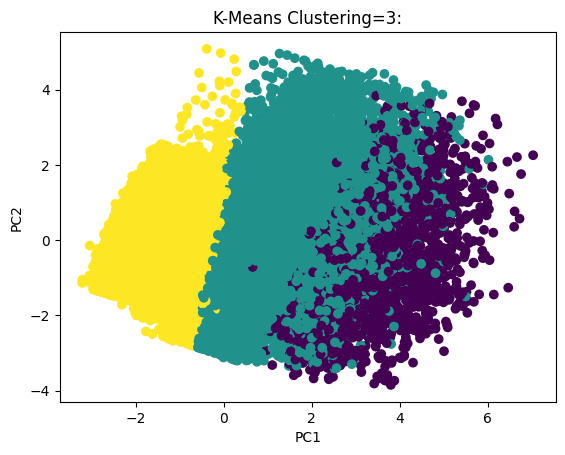

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Time taken by KMeans algorithm:  1.5845329761505127 seconds


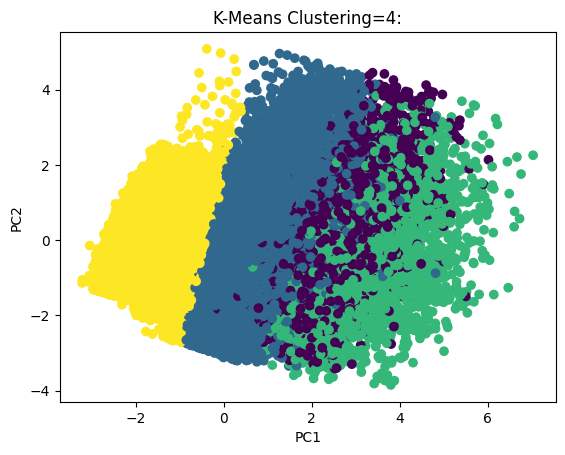

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Time taken by KMeans algorithm:  1.8670423030853271 seconds


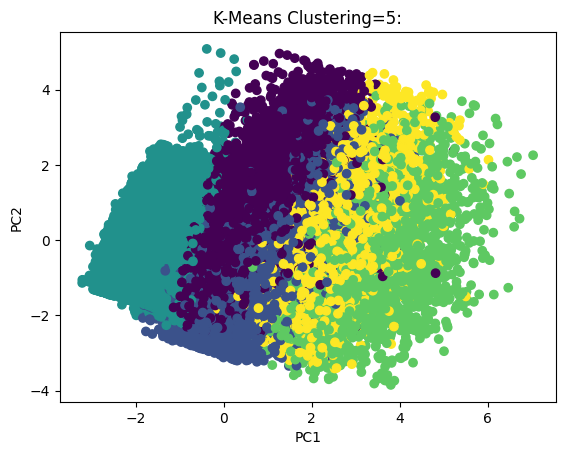

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Time taken by KMeans algorithm:  3.7392048835754395 seconds


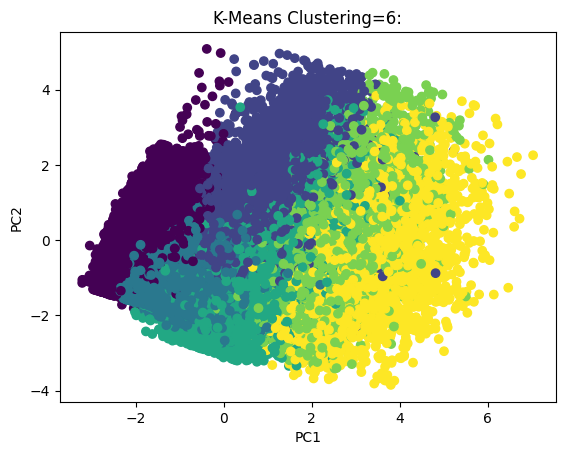

In [ ]:
#@title No of clusters & Visualize
from sklearn.decomposition import PCA
for k in range(3, 7):
      start_time = time.time()
      kmeans = KMeans(n_clusters=k, random_state=42)
      y_kmeans = kmeans.fit_predict(X_std)


      pca = PCA(n_components=2)
      end_time = time.time()
      print("Time : ", end_time - start_time, "seconds")
      X_pca = pca.fit_transform(X_std)
      plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans)
      plt.title(f'K-Means Clustering={k}:')
      plt.ylabel('PC2')
      plt.xlabel('PC1')

      plt.show()


In [ ]:
#@title KNN
k = 2
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train_norm, y_train)

y_pred = knn.predict(X_test_norm)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN classifier with k={k}: {accuracy}")



Accuracy of KNN classifier with k=2: 0.9629
